<a href="https://colab.research.google.com/github/Alafiade/Implementation-of-VGG-11-architecture/blob/main/VGG_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
from torchvision import datasets


In [3]:
from torchvision import transforms

In [4]:
train = datasets.CIFAR10('/data', train=True, download=True, transform= transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4915,0.4823,0.4468),
                         (0.2470,0.2435,0.2616))
]))

test = datasets.CIFAR10('/data', train=False, download=True, transform =  transforms.ToTensor())


100%|██████████| 170M/170M [00:05<00:00, 30.7MB/s]


In [5]:
len(train),(test)

(50000,
 Dataset CIFAR10
     Number of datapoints: 10000
     Root location: /data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [6]:
img_t,label = train[99]
type(img_t)

torch.Tensor

In [7]:
img_t.shape

torch.Size([3, 32, 32])

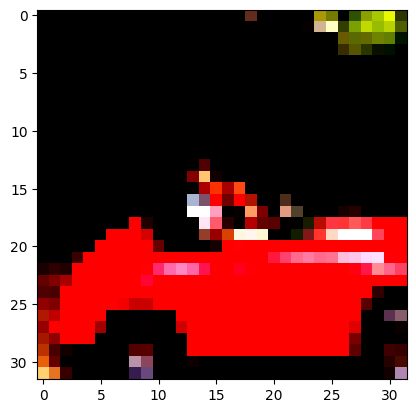

In [8]:
import matplotlib.pyplot as plt
img, label = train[99]
class_names = train.classes
img, label, class_names[label]
plt.imshow(img.permute(1,2,0))

In [9]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train, batch_size=64, shuffle=True)
test_loader = DataLoader(test, batch_size = 64, shuffle= False)

In [15]:
import torch.nn as nn

VGG_MODEL = nn.Sequential(
    nn.Conv2d(in_channels =3, out_channels=64, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Conv2d(in_channels=64,out_channels= 128,kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Conv2d(in_channels = 512, out_channels = 512 , kernel_size=3,  stride=1 ,padding=1),
    nn.ReLU(),
    nn.Conv2d(in_channels = 512, out_channels=512, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Flatten(),
    nn.Linear(512,4096),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(4096,4096),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(4096,10)
)

model = VGG_MODEL

In [11]:
loss_fn = nn.CrossEntropyLoss()

In [16]:
numel_list = [p.numel()
for p in VGG_MODEL.parameters()
if p.requires_grad == True]

sum(numel_list), numel_list

(28144010,
 [1728,
  64,
  73728,
  128,
  294912,
  256,
  589824,
  256,
  1179648,
  512,
  2359296,
  512,
  2359296,
  512,
  2359296,
  512,
  2097152,
  4096,
  16777216,
  4096,
  40960,
  10])

In [17]:
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr=1e-2)

In [ ]:
n_epochs = 50

for epoch in range(n_epochs):
  for img, labels in train_loader:
    # batch_size = img.shape[0] # This line is not needed if not flattening here
    out = model(img)
    loss = loss_fn(out, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print('Epoch: %d, Loss: %f'% (epoch, float(loss)))

/tmp/ipython-input-3689560789.py:13: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  print('Epoch: %d, Loss: %f'% (epoch, float(loss)))


Epoch: 0, Loss: 2.301178
Epoch: 1, Loss: 2.299757
Epoch: 2, Loss: 2.299726
Epoch: 3, Loss: 2.302083
Epoch: 4, Loss: 2.302824


In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for imgs, labels in test_loader:
    batch_size = imgs.shape[0]
    outputs = model(imgs.view(batch_size,-1))
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]
    correct += int((predicted == labels).sum())
  print('Accuracy: %f', correct/ total)